<a href="https://colab.research.google.com/github/malakbayramovaa/pandas-tutorials/blob/main/Pandas_Izahlar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with Pandas

Pandas data cleaning və analysis işlərini Python-da sürətli və asan etmək üçün nəzərdə tutulmuş data structures və data manipulation alətlərini özündə cəmləyir. Pandas çox vaxt NumPy və SciPy kimi ədədi hesablama (numerical computing) alətləri, statsmodels və scikit-learn kimi analytical kitabxanalar, həmçinin matplotlib kimi data visualization kitabxanaları ilə birlikdə istifadə olunur.
Pandas, xüsusilə array-based functions və for loops istifadə etmədən data processing üstünlüyü kimi, NumPy-nin array-based computing üslubunun böyük hissəsini özünə götürür. Pandas NumPy-dən bir çox kod yazma üslubunu götürsə də, əsas fərq ondadır ki, pandas tabular və ya heterogeneous data ilə işləmək üçün hazırlanıb. NumPy isə əksinə, homogeneous numerical array data ilə işləmək üçün daha uyğundur.


In [2]:
 # Datanı import etmək
import pandas as pd

Beləliklə, kodda nə vaxt pd. görsəniz, bu pandas-a aiddir.

Həmçinin Series və DataFrame obyektləri çox tez-tez istifadə olunduğu üçün onları local namespace-ə import etmək daha rahat ola bilər:

In [3]:
from pandas import Series, DataFrame

# Introduction to pandas Data Structures

pandas ilə başlamaq üçün onun iki əsas işçi data structure-ı ilə rahat olmalısan: Series və DataFrame.
Bu struktur­lar hər problem üçün universal həll olmasa da, əksər tətbiqlər üçün möhkəm və istifadəsi rahat baza yaradır.

# Series

Series — içində bir sıra dəyərlər olan (NumPy tiplərinə oxşar) birölçülü array-like obyekt­dir və bu dəyərlərə bağlı index adlanan label array-i saxlayır.

Ən sadə Series, yalnız data array-i ilə yaradılır:

In [4]:
obj = pd.Series([4,7,-5,3])
obj

,0
0,4
1,7
2,-5
3,3


Series-i interaktiv olaraq çap etdikdə solda index, sağda isə dəyərlər görünür.
Biz data üçün index təyin etmədiyimiz üçün pandas avtomatik olaraq 0-dan N–1-ə qədər default index yaradır.

Series-in array şəklini və index obyektini values və index atributları ilə əldə edə bilərsən:

In [5]:
obj2=pd.Series([1,2,3,4,5], index=['a', 'b', 'c', 'd', 'e'])
obj2

,0
a,1
b,2
c,3
d,4
e,5


In [6]:
obj2*2

,0
a,2
b,4
c,6
d,8
e,10


Series-i başqa cür də düşünmək olar:
Sabit uzunluğa malik, sıralanmış bir dict — yəni index value-ların data value-lara map olunmuş forması. Dict istifadə olunan bir çox yerdə Series də istifadə oluna bilər:

In [7]:
'b' in obj2
True

True

In [8]:
'l' in obj2

False

Python dict-də olan datanı Series-ə çevirmək üçün həmin dict-i ötürmək kifayətdir:

In [9]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3= pd.Series(sdata)
obj3

,0
Ohio,35000
Texas,71000
Oregon,16000
Utah,5000


Əgər yalnız dict ötürülürsə, yaranan Series-in index-i dict-in açarlarının sort olunmuş variantı olacaq.
Bu davranışı dəyişmək üçün index-i özün istədiyin sırada verə bilərsən:

In [10]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

,0
California,NaN
Ohio,35000.0
Oregon,16000.0
Texas,71000.0


Burada sdata-da olan üç dəyər uyğun yerlərə yerləşdirildi, lakin ‘California’ üçün dəyər olmadığından NaN (not a number) kimi göstərildi — pandas-da bu, missing və ya NA value deməkdir.

‘Utah’ states siyahısında olmadığı üçün nəticədə görünmür.

Mən “missing” və “NA” terminlərini bir-birinin əvəzinə istifadə edəcəyəm.
Missing data aşkarlamaq üçün pandas-da isnull və notnull funksiyalarından istifadə edilir:

In [11]:
pd.isnull(obj4)

,0
California,True
Ohio,False
Oregon,False
Texas,False


In [12]:
pd.notnull(obj4)

,0
California,False
Ohio,True
Oregon,True
Texas,True


Series-də bunların instance method-ları da mövcuddur:

In [13]:
obj4.isnull()

,0
California,True
Ohio,False
Oregon,False
Texas,False


Series-in bir çox tətbiq üçün faydalı olan özəlliklərindən biri — arithmetic əməliyyatlarında index-lərə görə avtomatik align olmasıdır:

In [14]:
obj3

,0
Ohio,35000
Texas,71000
Oregon,16000
Utah,5000


In [15]:
obj4

,0
California,NaN
Ohio,35000.0
Oregon,16000.0
Texas,71000.0


In [16]:
obj3+obj4

,0
California,NaN
Ohio,70000.0
Oregon,32000.0
Texas,142000.0
Utah,NaN


Bu davranışı databases-dəki join əməliyyatına bənzətmək olar.

Series və onun index-i name atributuna malikdir və bu atribut pandas funksionallığında mühüm rol oynayır:

In [17]:
obj4.name='population'
obj4.index.name='state'
obj4

,population
state,
California,NaN
Ohio,35000.0
Oregon,16000.0
Texas,71000.0


Series-in index-i assignment ilə birbaşa (in-place) dəyişdirilə bilər:

In [18]:
obj

,0
0,4
1,7
2,-5
3,3


In [19]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

,0
Bob,4
Steve,7
Jeff,-5
Ryan,3


# DataFrame

DataFrame ikiölçülü düzbucaqlı cədvəl şəklində verilənləri təmsil edir və hər biri fərqli tipdə dəyərlərə sahib ola bilən (numeric, string, boolean və s.) sütunların ardıcıl kolleksiyasından ibarətdir. DataFrame həm row index, həm də column index-ə malikdir; onu eyni index-i paylaşan Series-lərdən ibarət dict kimi düşünmək olar. Arxa planda məlumat birölçülü massivlərdən (list və ya dict) deyil, bir və ya daha çox ikiölçülü blok kimi saxlanılır.

Qeyd:

DataFrame fiziki olaraq ikiölçülü olsa da, hierarxik indexing istifadə etməklə daha yüksəkölçülü məlumatı da tabular formada göstərmək mümkündür.

# DataFrame yaratma

DataFrame yaratmağın bir çox yolu var, lakin ən çox istifadə edilən üsullardan biri bərabər uzunluqlu list və ya NumPy array-lərdən ibarət dict verməkdir:

In [20]:
data = {
 'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
}
frame = pd.DataFrame(data)

In [21]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

**head() — ilk 5 sətri göstərmək**

Böyük DataFrame-lərdə yalnız ilk beş sətri göstərmək üçün:

In [22]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


**Sütunların ardıcıllığını dəyişmək**

Sütunları istədiyiniz ardıcıllıqla göstərmək üçün:

In [23]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2



Əgər dict-də olmayan sütunu versəniz, həmin sütun nəticədə missing values (NaN) ilə görünəcək.




**Index təyin etmək və əskik sütunlar**

In [24]:
frame2 = pd.DataFrame(
    data,
    columns=['year', 'state', 'pop', 'debt'],
    index=['one', 'two', 'three', 'four', 'five', 'six']
)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


**Sütun seçmək**

Sütunu Series kimi əldə etmək üçün iki yol var:

In [25]:
frame2['state']
frame2.year

,year
one,2000
two,2001
three,2002
four,2001
five,2002
six,2003


Qeyd:

frame2.column sintaksisi yalnız sütun adı Python dəyişən adı kimi keçərlidirsə işləyir (məsələn, boşluq və ya xüsusi simvol olmamalıdır).

**Sətir seçmək – loc**

Index adına görə sətir seçmək:

In [26]:
frame2.loc['three']


,three
year,2002
state,Ohio
pop,3.6
debt,NaN


**Sütun dəyişmək və ya yeni sütun yaratmaq**

Scalar dəyər vermək:

In [27]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


NumPy array vermək:

In [28]:
import numpy as np
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


Series vermək (index-ə görə düzləndirilir):

In [29]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
val

,0
two,-1.2
four,-1.5
five,-1.7


**Yeni sütun yaratmaq**

In [30]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


**Sütunu silmək — del**

In [31]:
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


**Vacib qeyd**

DataFrame-dən indexing ilə seçilən sütun view-dur, copy deyil.
Series üzərində aparılan in-place dəyişikliklər birbaşa DataFrame-ə də təsir edir.

Copy yaratmaq üçün:

In [32]:
col = frame2['state'].copy()
col

,state
one,Ohio
two,Ohio
three,Ohio
four,Nevada
five,Nevada
six,Nevada


**Nested dict → DataFrame**

İç-içə dict verilərsə:

In [33]:
pop = {
    'Nevada': {2001: 2.4, 2002: 2.9},
    'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}
}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


xarici dict-in açarları → sütun adları

daxili dict-in açarları → satır index-i olur.

**Transpose — T**

In [34]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


Sətirlərlə sütunların yerləri dəyişdirir.

**Index təyin edərək yaratmaq**

In [35]:
pd.DataFrame(pop, index=[2001, 2002, 2003])


,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


Öz index-inizi verdikdə NaN-lar uyğun olaraq əlavə edilir.

**Dict of Series → DataFrame**

In [36]:
pdata = {
    'Ohio': frame3['Ohio'][:-1],
    'Nevada': frame3['Nevada'][:2]
}
pd.DataFrame(pdata)


,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


**index.name və columns.name**

Əgər index və sütunların name atributunu təyin etsəniz, onlar DataFrame-də göstəriləcək:

In [37]:
frame3.index.name = 'year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


**values atributu**

DataFrame.values DataFrame-in məlumatlarını ikiölçülü ndarray kimi qaytarır:

In [38]:
frame3.values


array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

Əgər sütunların dtype-ları fərqlidirsə, NumPy bütün dəyərlər üçün uyğun olacaq ümumi dtype seçir (məsələn, object).

In [39]:
frame2.values


array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

# Index Objects

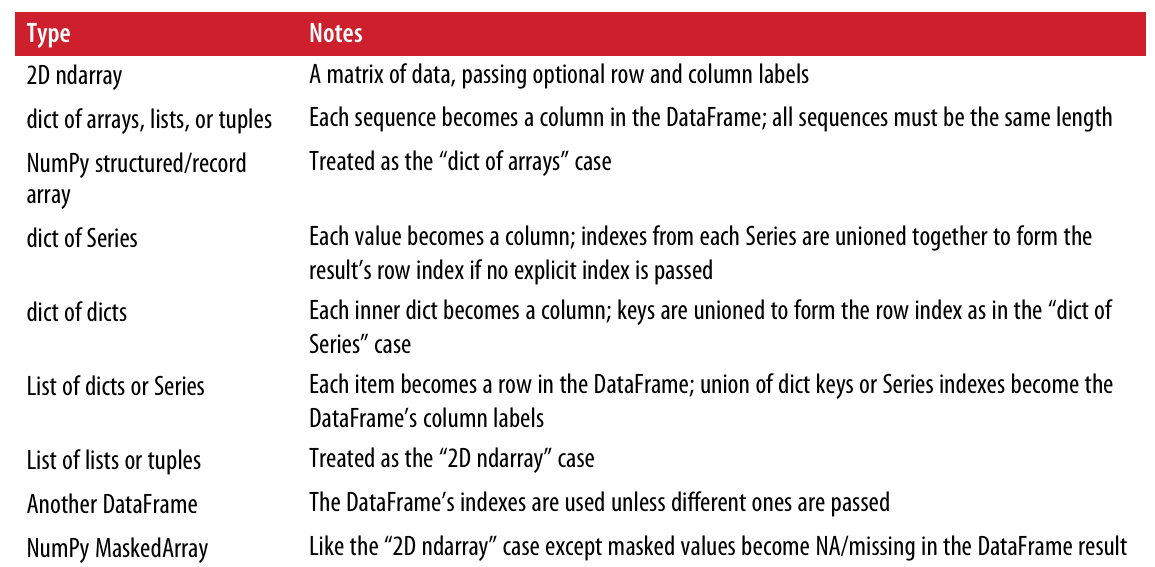

pandas-da Index obyektləri axis label-ları (yəni sətir və sütun adlarını) və digər metadata-nı (məsələn, axis name) saxlayan strukturlardır.
Series və ya DataFrame yaradarkən istifadə etdiyiniz hər bir array və ya label siyahısı daxildə avtomatik olaraq Index obyektinə çevrilir:

In [40]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index


Index(['a', 'b', 'c'], dtype='object')

Slice etdikdə də yenə Index obyektini qaytarır:

In [41]:
index[1:]


Index(['b', 'c'], dtype='object')

**Index obyektləri dəyişdirilə bilməz (immutable)**

Index immutable olduğu üçün istifadəçi tərəfindən dəyişdirilə bilməz:

In [42]:
#index[1] = 'd'   # TypeError

Bu immutability, Index obyektlərinin bir neçə data strukturu arasında təhlükəsiz şəkildə paylaşılmasını təmin edir.

**Index paylaşma nümunəsi**

In [43]:
labels = pd.Index(np.arange(3))
labels
# Int64Index([0, 1, 2], dtype='int64')

obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2
# 0    1.5
# 1   -2.5
# 2    0.0
# dtype: float64

obj2.index is labels
# True


True

Burada görünür ki, obj2.index tam olaraq eyni labels obyektidir — yəni paylaşılır.

**Niyə Index vacibdir?**

Bəzən istifadəçilər Index imkanlarından çox istifadə etməsələr də, pandas-da bir çox əməliyyat nəticəsində yaranan obyektlərdə Index mövcud olur. Ona görə də Index-in necə işlədiyini başa düşmək vacibdir.

**Index həm də set kimi davranır**

Index array-ə bənzədiyi kimi, sabit ölçülü set kimi də davranır.

In [44]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Sütunları göstərmək:

In [45]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

Əlavə yoxlamalar:

In [46]:
print('Ohio' in frame3.columns)

2003 in frame3.index



True


False

**Index Python set-lərindən fərqli olaraq duplicate (təkrar) label-lara icazə verir**

In [47]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels



Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

Eyni label ilə seçim etdikdə, həmin label-in bütün təkrarlanan sətirləri seçiləcək.

**Index obyektlərində set məntiqi üçün metodlar**

Hər bir Index-də set əməliyyatları (kəsişmə, birləşmə, fərq və s.) üçün metod və xüsusiyyətlər var.
Bu metodlar Index-in içindəki məlumat haqqında ümumi suallara cavab verir.

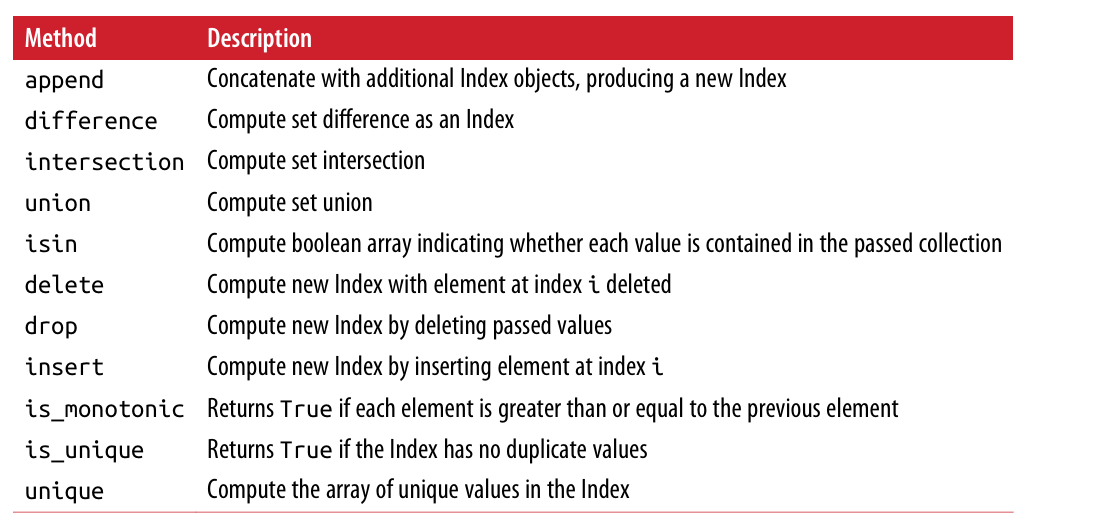

# Essential Functionality

**Reindexing**

pandas obyektləri üzərində ən vacib metodlardan biri reindex metodudur.
Bu, məlumatı yeni index-ə uyğunlaşdıraraq yeni obyekt yaratmaq deməkdir.

In [48]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj


,0
d,4.5
b,7.2
a,-5.3
c,3.6


reindex çağırdıqda — məlumat yeni index sırasına uyğun şəkildə düzülür.
Yeni index-də olmayan elementlər üçün NaN yaradılır:

In [49]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2


,0
a,-5.3
b,7.2
c,3.6
d,4.5
e,NaN


**Reindex zamanı doldurma (fill) və interpolasiya**

Əgər sənin məlumatların ardıcıldırsa (məsələn time series), reindex zamanı boş yerləri doldurmaq istəyə bilərsən.

Bunun üçün method= parametri istifadə olunur.
Məsələn ffill — əvvəlki qiyməti irəliyə doğru doldurur (forward fill):

In [50]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill')


,0
0,blue
1,blue
2,purple
3,purple
4,yellow
5,yellow


**DataFrame-də reindex**

DataFrame üçün reindex həm sətirləri (row index), həm də sütunları (columns) dəyişə bilər.

Sırf bir siyahı ötürsən — row index üzrə reindex edəcək:

In [51]:
frame = pd.DataFrame(
    np.arange(9).reshape((3, 3)),
    index=['a', 'c', 'd'],
    columns=['Ohio', 'Texas', 'California']
)
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [52]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2


,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


**Sütunları reindex etmək**

Sütunları dəyişmək üçün columns= parametri:

In [53]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)


,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


# Alternativ: loc ilə daha qısa şəkildə reindex

In [54]:
states

['Texas', 'Utah', 'California']

In [55]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [56]:
frame = pd.DataFrame(
    np.arange(9).reshape((3, 3)),
    index=['a', 'c', 'd'],
    columns=['Ohio', 'Texas', 'California']
)


In [57]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2.reindex(columns=['Texas', 'California'])


,Texas,California
a,1.0,2.0
b,NaN,NaN
c,4.0,5.0
d,7.0,8.0


In [58]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
states = ['Texas', 'Ohio', 'California']
frame2.loc[:, states]


,Texas,Ohio,California
a,1.0,0.0,2.0
b,NaN,NaN,NaN
c,4.0,3.0,5.0
d,7.0,6.0,8.0


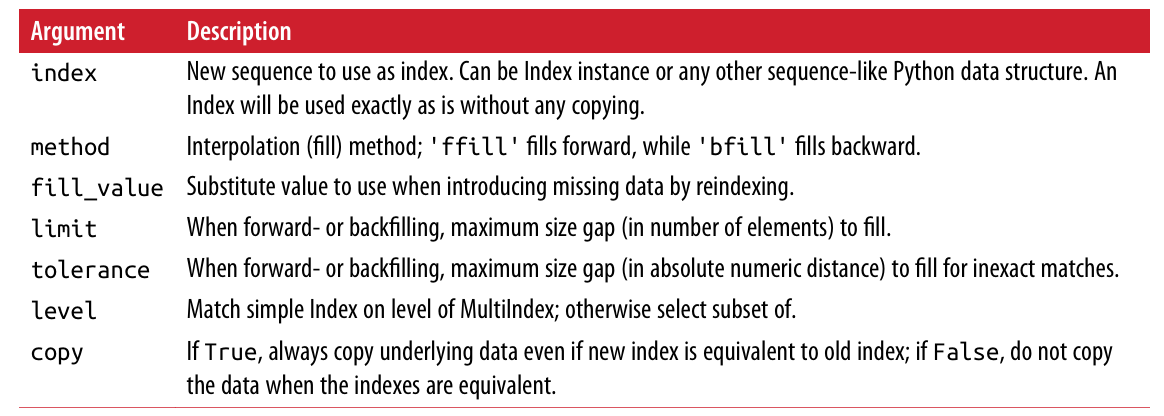

# Dropping Entries from an Axis

Bir ox üzrə (axis) bir və ya bir neçə elementin silinməsi çox asandır, əgər artıq o elementlərsiz bir index massivi və ya siyahı varsa.
Amma bunu əldə etmək üçün bəzən əlavə işləmələr və set məntiqi lazım olur. Buna görə də drop metodu verilmiş dəyəri və ya dəyərləri həmin oxdan silərək yeni obyekt qaytarır.

**Series üzərində drop**

In [59]:
obj = pd.Series(np.arange(5.), index = ['a', 'b', 'c', 'd', 'e'])
obj

,0
a,0.0
b,1.0
c,2.0
d,3.0
e,4.0


**Tək element silmək**

In [60]:
new_obj = obj.drop('c')

**Bir neçə element silmək**

In [61]:
obj.drop(['d', 'c'])

,0
a,0.0
b,1.0
e,4.0


**DataFrame üzərində drop**

DataFrame-də həm sətirləri (axis=0), həm də sütunları (axis=1) silmək olar.

In [62]:
data=pd.DataFrame(
    np.arange(16).reshape((4,4)),
    index=['Ohio', 'Colorado', 'Utah', 'New York'],
    columns=['one', 'two', 'three', 'four']
)
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


**Sətirləri silmək**

In [63]:
data.drop(['Colorado', 'Ohio'])


,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


**Sütunları silmək**

In [64]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


və ya birdən çox sütun:

In [65]:
data.drop(['two', 'four'], axis='columns')


,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


**inplace haqqında xəbərdarlıq**

inplace=True obyektin özünün dəyişdirilməsi deməkdir.

In [66]:
obj.drop('c', inplace=True)


Bu, Series içindəki c elementini geri qaytarmaq mümkün olmayacaq şəkildə silir.

**Indexing, Selection və Filtering (Series)**

Series-də indeksləmə NumPy array indeksləməsinə oxşayır, amma burada etiketlərdən (index values) istifadə etmək mümkündür.

In [67]:
obj = pd.Series(np.arange(4.), index = ['a', 'b', 'c', 'd'])

In [68]:
print(obj['b'])
print(obj[1])
print(obj[2:4])  # c ve d
print(obj[['b', 'a', 'd']])  # sirali secmek

1.0
1.0
c    2.0
d    3.0
dtype: float64
b    1.0
a    0.0
d    3.0
dtype: float64


/tmp/ipython-input-3319950603.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(obj[1])


**Boolean filter**

In [69]:
obj[obj<2]

,0
a,0.0
b,1.0


**Label ilə slicing → Son nöqtə daxildir**

Python slicing-də son element daxil olmur, amma pandas Series-də label slicing zamanı son nöqtə də daxil edilir:

In [70]:
obj['b': 'c']

,0
b,1.0
c,2.0


**DataFrame-də sütun seçmək**

In [71]:
# tek sutun secmek
data['two']


,two
Ohio,1
Colorado,5
Utah,9
New York,13


In [72]:
# bir nece sutun secmek
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


**DataFrame slicing (sətirlər)**

In [73]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


Bu, ilk iki sətri qaytarmaq üçün qısayoldur.

**Boolean DataFrame ilə seçim**

In [74]:
data < 5
# Bu, TRUE/FALSE-lardan ibarət DataFrame qaytarır.

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [75]:
data[data<5]=0
# Bu, bütün 5-dən kiçik elementləri 0 edir.

**loc və iloc ilə seçim**

loc = label (adlarla seçim)

In [76]:
data.loc['Colorado', ['two', 'three']]

,Colorado
two,5
three,6


iloc = integer ( indeks nömrələri )

In [77]:
data.iloc[2, [3,0,1]]

,Utah
four,11
one,8
two,9


**Bütün sətri seçmək**

In [78]:
data.iloc[2]

,Utah
one,8
two,9
three,10
four,11


**Bir neçə sətir və sütun**

In [79]:
data.iloc[[1,2], [3,0,1]]


,four,one,two
Colorado,7,0,5
Utah,11,8,9


**loc və iloc ilə slicing**

In [80]:
data.loc[:'Utah','two']


,two
Ohio,0
Colorado,5
Utah,9


In [81]:
data.iloc[:, :3][data.three > 5]


,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


**ix haqqında qeyd**

ix əvvəllər həm label, həm integer indeksləmə üçün istifadə olunurdu.
Amma çoxlu problem yaratdığı üçün deprecated edilib.
İndi:

loc → yalnız label

iloc → yalnız integer

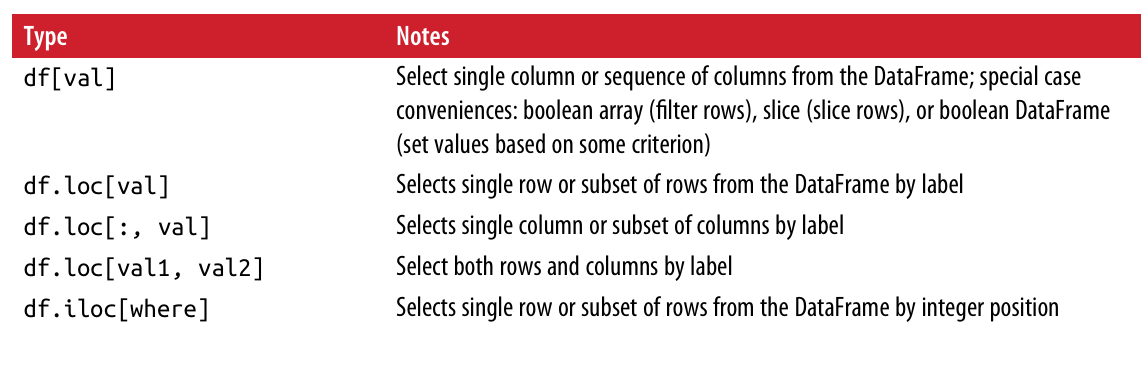

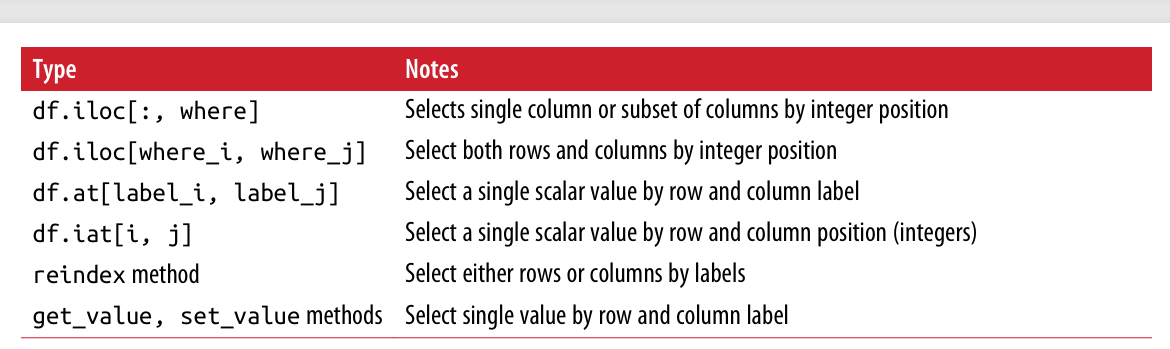

# Integer Indexes

**Əgər Series və ya DataFrame-in integer index-i varsa:**

➡️ Seçim həmişə label-oriented olur.
Yəni ser[1] demək index=1 olan elementi seçmək deməkdir, pozisiya 1 yox.

Daha dəqiq idarə etmək üçün:

loc → label ilə seçim

iloc → integer pozisiya ilə seçim

In [82]:
ser = pd.Series(np.arange(3.))
ser[:1]

,0
0,0.0


In [83]:
ser.loc[:1]

,0
0,0.0
1,1.0


In [84]:
ser.iloc[:1]

,0
0,0.0


# Arithmetic and Data Alignment

pandas-ın vacib xüsusiyyətlərindən biri — fərqli index-ləri olan obyektlər arasında riyazi əməliyyat apararkən, nəticənin index-lərin birləşməsi (union) əsasında qurulmasıdır.

Bu, verilənlər bazasındakı outer join prinsipinə bənzəyir.

**iki Series toplanması**

In [85]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])


In [86]:
s1 + s2

,0
a,5.2
c,1.1
d,NaN
e,0.0
f,NaN
g,NaN


index-lər üst-üstə düşməyən yerlərdə NaN yaranır.

# DataFrame-lərdə Alignment

DataFrame-lərdə həm row index, həm də columns üzrə alignment edilir:

Əgər sütun hər iki DataFrame-də yoxdursa → nəticədə yalnız NaN olur.

**No overlap məsələsi**

Əgər ümumiyyətlə ortaq column və index yoxdursa:

In [87]:
s1 - s2

,0
a,9.4
c,-6.1
d,NaN
e,3.0
f,NaN
g,NaN


#Arithmetic methods with fill values

Bəzən istəyirsən ki, iki DataFrame toplananda boş yerlər 0 ilə doldurulsun.

Bu zaman:

In [88]:
s1.add(s2, fill_value=0)


,0
a,5.2
c,1.1
d,3.4
e,0.0
f,4.0
g,3.1


Bu kod index və column uyğun gəlməyən yerləri 0 ilə doldurur.

Nəticə isə:

əvvəl NaN olan yerlər → 0 hesablanır

mövcud qiymətlər → normal şəkildə toplanır

**r-method-lar haqqında**

pandas-da hər riyazi metodun r ilə başlayan bir versiyası var.

In [89]:
1/s1

,0
a,0.136986
c,-0.400000
d,0.294118
e,0.666667


In [90]:
s1.rdiv(1)

,0
a,0.136986
c,-0.400000
d,0.294118
e,0.666667


Tam eyni nəticəni verir – sadəcə arqumentləri tərsinə tətbiq edir.

**Reindex zamanı fill_value**

Series və ya DataFrame-ə reindex edərkən də boş yerləri doldurmaq mümkündür.

Bu zaman olmayan sütunlar üçün 0 yazılır.

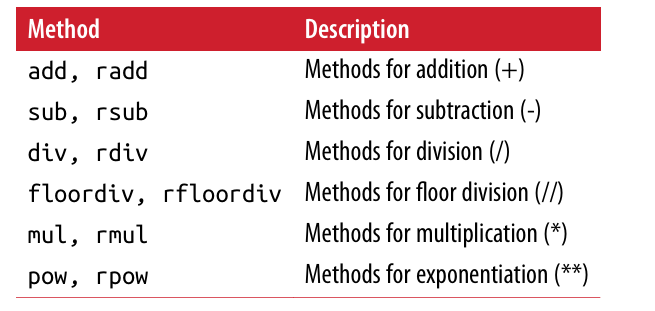

**Operations between DataFrame and Series**

NumPy array-lərinin müxtəlif ölçüləri kimi, DataFrame və Series arasında arifmetik əməliyyatlar da müəyyən olunub.

Birincisi, motivasiya üçün belə bir nümunəyə baxaq: ikiölçülü bir array ilə onun sətirlərindən birinin fərqi:

In [92]:
arr = np.arange(12.).reshape((3,4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [93]:
arr[0]

array([0., 1., 2., 3.])

Biz arr[0]-ı arr-dan çıxanda, çıxma əməliyyatı hər sətir üçün ayrıca icra olunur. Bu proses broadcasting adlanır

In [95]:
frame = pd.DataFrame(
    np.arange(12.).reshape((4,3)),
    columns = list('bde'),
    index = ['Utah', 'Ohio', 'Texas', 'Oregon']
)
series = frame.iloc[0]
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


Default olaraq, DataFrame və Series arasında arifmetik əməliyyat aparanda, Series-in index-i DataFrame-in columns-ları ilə uyğunlaşdırılır və hesablama aşağıya doğru (sətirlər boyunca) broadcast edilir:

In [96]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


Əgər DataFrame-in columns-larında və Series-in index-ində olmayan bir açar (index value) varsa, obyektlər union üzrə yenidən index-lənir:

In [97]:
series2 = pd.Series(range(3), index = ['b', 'e', 'f'])
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


Əgər əksinə – yəni əməliyyatı columns deyil, rows üzrə uyğunlaşdırmaq istəsən, bu zaman arifmetik metodlardan birini istifadə etməlisən.

In [99]:
series3 = frame['d']
series3

,d
Utah,1.0
Ohio,4.0
Texas,7.0
Oregon,10.0


Aşağıdakı kod Series-i row index-ə uyğunlaşdırıb broadcasting edir:

In [100]:
frame.sub(series3, axis = 'index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


Burada axis='index' (yaxud axis=0) deməkdir ki, uyğunlaşdırma DataFrame-in sətirləri üzrə aparılır və hesablama sütunlara doğru broadcast edilir.

# Function Application and Mapping

NumPy ufuncs (element-wise array metodları) pandas obyektləri ilə də işləyir:

In [101]:
frame = pd.DataFrame(np.random.randn(4,3),
                     columns = list('bde'),
                     index = ['Utah', 'Ohio', 'Texas', 'Oregon'])

In [102]:
frame

,b,d,e
Utah,1.703301,0.099580,-1.789964
Ohio,0.093927,-1.513166,-0.390416
Texas,-0.830576,0.080598,-0.660342
Oregon,-0.022840,-0.186949,-0.620468


In [103]:
np.abs(frame)

,b,d,e
Utah,1.703301,0.099580,1.789964
Ohio,0.093927,1.513166,0.390416
Texas,0.830576,0.080598,0.660342
Oregon,0.022840,0.186949,0.620468


Başqa çox yayılmış əməliyyat — bir funksiyanı hər bir sütuna və ya sətirə tətbiq etməkdir.

**DataFrame-in apply** metodu bunu tam olaraq edir:

In [104]:
f = lambda x: x.max() - x.min()
frame.apply(f)

,0
b,2.533877
d,1.612746
e,1.399548


Burada f funksiyası (Series-də maksimum və minimum arasındakı fərqi hesablayır) frame-dəki hər sütuna bir dəfə tətbiq olunur.
Nəticədə sütun adları index olan bir Series alınır.

Əgər axis='columns' versən, funksiya bu dəfə hər sətir üçün tətbiq olunacaq:

In [105]:
frame.apply(f,axis = 'columns')

,0
Utah,3.493265
Ohio,1.607093
Texas,0.911173
Oregon,0.597628


Əksər statistik metodlar (sum, mean və s.) artıq DataFrame-də hazır metodlardır, ona görə apply istifadə etmək çox vaxt lazım olmur.

apply funksiyanı tək bir rəqəm qaytaran hala məcbur etmir;
o, Series də qaytara bilər:

In [106]:
def f(x):
  return pd.Series([x.min(), x.max()], index = ['min', 'max'])

Element-wise Python funksiyalarından da istifadə etmək olar.

Məsələn, hər bir float dəyəri formatlanmış string-ə çevirmək istəyirsənsə:

In [110]:
format = lambda x: '%.2f' % x
frame.applymap(format)

/tmp/ipython-input-1073433956.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame.applymap(format)


,b,d,e
Utah,1.70,0.10,-1.79
Ohio,0.09,-1.51,-0.39
Texas,-0.83,0.08,-0.66
Oregon,-0.02,-0.19,-0.62


Burada applymap “element-wise function” tətbiq etdiyi üçün bu adlandırılıb.

**Series-də isə map metodu var**

Series obyektində element-wise tətbiq olunan funksiyalar üçün map metodu var:

In [111]:
frame['e'].map(format)

,e
Utah,-1.79
Ohio,-0.39
Texas,-0.66
Oregon,-0.62


# Sorting and Ranking

Bir dataset-i müəyyən meyara görə sort (sıralamaq) etmək digər vacib daxili əməliyyatlardan biridir.
Sətir və ya sütun indeksinə görə leksikoqrafik sort etmək üçün sort_index metodundan istifadə edin; bu metod yeni və sıraya salınmış obyekt qaytarır.

In [112]:
obj = pd.Series(range(4), index = ['d', 'a', 'b', 'c'])
obj.sort_index()

,0
a,1
b,2
c,3
d,0


DataFrame ilə hər iki ox üzrə indeksə görə sort etmək mümkündür.

In [113]:
frame = pd.DataFrame(np.arange(8).reshape((2,4)),
                     index = ['three',  'one'],
                     columns = ['d', 'a', 'b', 'c'])
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [114]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


Data default olaraq artan sıra ilə sort edilir, lakin azalan sıra ilə sort etmək də mümkündür.

In [116]:
frame.sort_index(axis=1, ascending = False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


Series obyektini onun value-larına görə sort etmək üçün sort_values metodundan istifadə edin.

In [117]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

,0
2,-3
3,2
0,4
1,7


Default olaraq, NaN kimi çatışmayan dəyərlər Series-in sonunda yerləşdirilir.

In [118]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

,0
4,-3.0
5,2.0
0,4.0
2,7.0
1,NaN
3,NaN


DataFrame sort ediləndə bir və ya bir neçə sütunun dəyərlərindən sort açarı kimi istifadə etmək mümkündür. Bunun üçün sort_values metodunun by parametrinə bir və ya bir neçə sütun adı verilir.

In [119]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [120]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [121]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


**Ranking**

Ranking ->  massivdəki etibarlı dəyərlərin sayına uyğun olaraq 1-dən başlayaraq dəyərlərə sıra nömrəsi verilməsidir.  
Series və DataFrame üçün rank metodları istifadə olunur; default olaraq, eyni dəyərlər (ties) üçün orta reytinq verilir.

In [122]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

,0
0,6.5
1,1.0
2,6.5
3,4.5
4,3.0
5,2.0
6,4.5


In [123]:
obj.rank(method='first')

,0
0,6.0
1,1.0
2,7.0
3,4.0
4,3.0
5,2.0
6,5.0


Burada 0 və 2 indeksli elementlər üçün orta reytinq 6.5 verilmək əvəzinə, onların dəyərləri dataset-də 0 daha əvvəl gəldiyi üçün sırasıyla 6 və 7 olaraq təyin edilmişdir.

Azalan sıra ilə də reytinq vermək mümkündür.



In [124]:
obj.rank(ascending=False, method='max')

,0
0,2.0
1,7.0
2,2.0
3,4.0
4,5.0
5,6.0
6,4.0


In [125]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2],
                      'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})

In [126]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


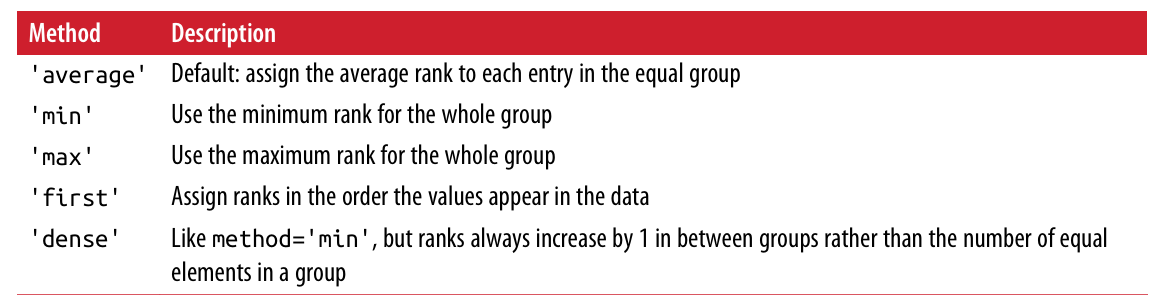

# Axis Indexes with Duplicate Labels

İndiyə qədər baxdığımız bütün nümunələrdə index values unikal idi.

Bəzi pandas funksiyaları (məsələn, reindex) etiketlərin unikal olmasını tələb etsə də, bu məcburi deyil.

Gəlin dublikat indeksləri olan kiçik bir Series nümunəsinə baxaq:

In [127]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

,0
a,0
a,1
b,2
b,3
c,4


Dublikat indekslər olduqda fərqli davranan əsas proseslərdən biri data seçimidir. Bir indeks etiketinə birdən çox sətir uyğun gəlirsə, həmin etiketi çağıranda Series qaytarılır;
yalnız bir sətir uyğun gəlirsə, skalyar (scalar) dəyər qaytarılır:

In [128]:
obj['a']

,0
a,0
a,1


In [129]:
obj['c']

np.int64(4)

Bu vəziyyət kodu daha mürəkkəb edə bilər, çünki indeksdən götürülən nəticənin tipi etiketin təkrarlanıb-təkrarlanmamasından asılı olaraq dəyişir.

Eyni məntiq DataFrame-də sətirləri indeksləyərkən də keçərlidir:

In [130]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,-0.145259,-0.850056,0.233907
a,0.703761,0.113975,-0.784225
b,-1.334460,-1.657890,-0.773685
b,-0.743899,1.016659,-1.345659


# Summarizing and Computing Descriptive Statistics

pandas obyektləri ümumi riyazi və statistik metodların bir dəsti ilə təmin olunub. Bu metodların çoxu reduction və ya summary statistics kateqoriyasına aiddir və Series-dən (məsələn, sum və ya mean kimi) tək bir dəyər çıxarmaq və ya DataFrame-in sətirlərindən və sütunlarından Series şəklində nəticə almaq üçün istifadə olunur. NumPy array-lərindəki oxşar metodlarla müqayisədə, bu metodlar missing data (NaN) üçün daxili işləmə mexanizminə malikdir.

In [131]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                  [np.nan, np.nan], [0.75, -1.3]],
                  index = ['a', 'b', 'c', 'd'],
                  columns = ['one', 'two'])

DataFrame-in sum metodunu çağırmaq sütunların cəmlərini Series kimi qaytarır:

In [132]:
df.sum()

,0
one,9.25
two,-5.80


axis='columns' və ya axis=1 yazdıqda cəm bu dəfə sətirlər üzrə hesablanır:

In [133]:
df.sum(axis='columns')

,0
a,1.40
b,2.60
c,0.00
d,-0.55


Bu əməliyyatlarda NA (NaN) dəyərlər nəzərə alınmır, yalnız bütün sətir və ya sütun NA olduqda nəticə NA olur.

Bu davranışı skipna=False ilə deaktiv etmək olar:

In [134]:
df.mean(axis= 'columns', skipna=False)

,0
a,NaN
b,1.300
c,NaN
d,-0.275


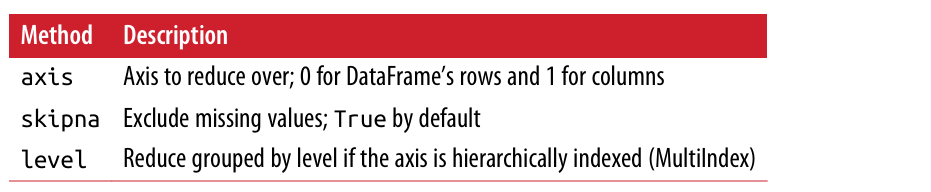

# Additional Statistical Methods

Bəzi metodlar, məsələn, idxmin və idxmax, minimum və ya maksimum dəyərin yerləşdiyi index dəyəri kimi dolayı statistik nəticələr qaytarır:

In [135]:
df.idxmax()

,0
one,b
two,d


Digər metodlar isə accumulation (yığılma) əməliyyatlarıdır:

In [136]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


Başqa bir metod növü var ki, nə reduction-dır, nə də accumulation. describe belə metodlara misaldır və birdəfəyə bir neçə təsviri statistika yaradır:

In [137]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


Sayısal olmayan məlumatlarda describe alternativ təsviri statistikalar yaradır:

In [138]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

,0
count,16
unique,3
top,a
freq,8


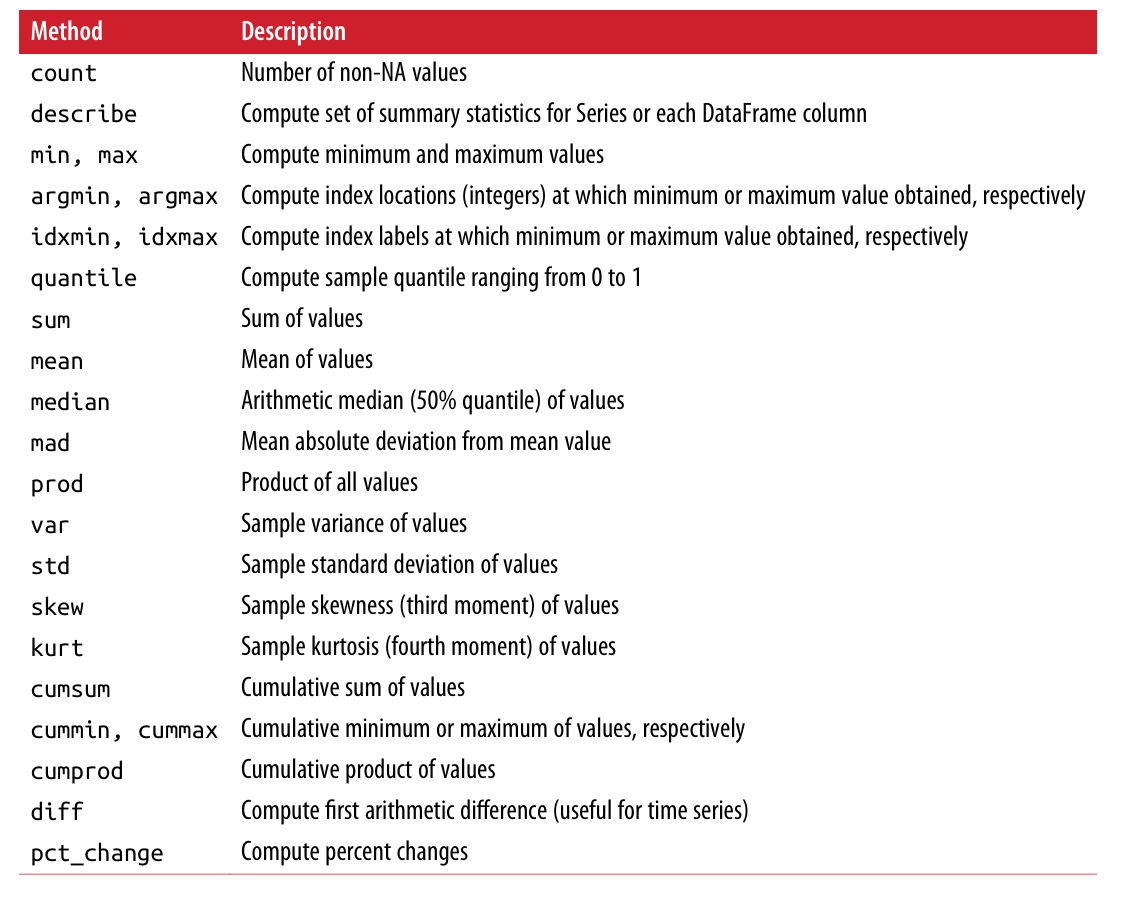

#  Correlation and Covariance

Bəzi yekun statistika növləri, məsələn correlation və covariance, arqument cütlükləri əsasında hesablanır.


**Correlation** --> a statistical measure that describes the relationship between two variables, indicating the extent to which they change together.

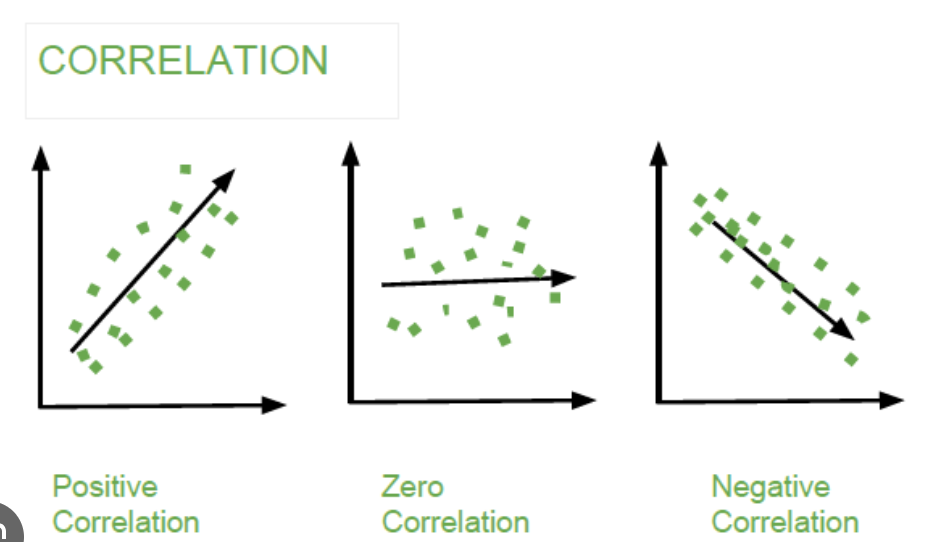

In probability theory and statistics, **covariance** is a measure of the joint variability of two random variables.

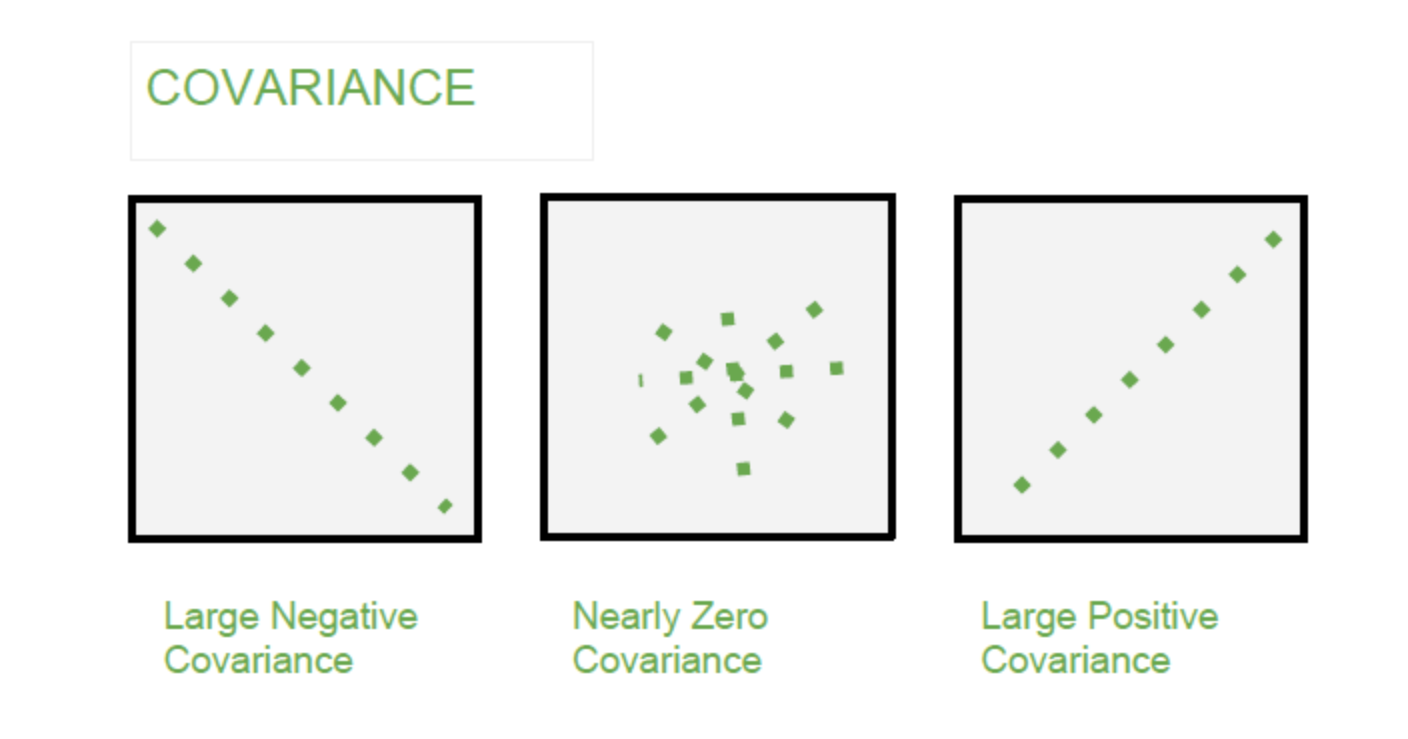

# Unique Values, Value Counts, and Membership

**unique()** — təkrarlanmayan dəyərləri qaytarır

In [149]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
uniques = obj.unique()

print(uniques)


['c' 'a' 'd' 'b']


unique() metodu Series-dəki təkrarlanmayan bütün elementləri qaytarır

Dəyərlər sıralı olmaya bilər

İstəsən onları sort() ilə sıralaya bilərsən:

In [151]:
uniques.sort()
uniques

array(['a', 'b', 'c', 'd'], dtype=object)

**value_counts()** — hər dəyərin neçə dəfə göründüyünü sayır

In [152]:
obj.value_counts()

,count
c,3
a,3
b,2
d,1


Avtomatik olaraq ən çoxdan aza doğru sıralanır.

value_counts həmçinin Pandas-ın top-level funksiyası kimi də istifadə edilə bilər:

In [153]:
pd.value_counts(obj.values, sort=False)


/tmp/ipython-input-4234849955.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(obj.values, sort=False)


,count
c,3
a,3
d,1
b,2


**isin()** — elementlər müəyyən bir siyahıda varmı?

isin() metodu vectorized set membership yoxlaması edir.
Məsələn, yalnız b və c olan elementləri seçək:

In [154]:
mask = obj.isin(['b', 'c'])
print(mask)


0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool


**Index.get_indexer()** — uyğun indexləri tapmaq

Bu metod bir massivdəki dəyərlərin digər massivdə hansı indeksdə olduğunu tapır.

In [155]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)


array([0, 2, 1, 1, 0, 2])

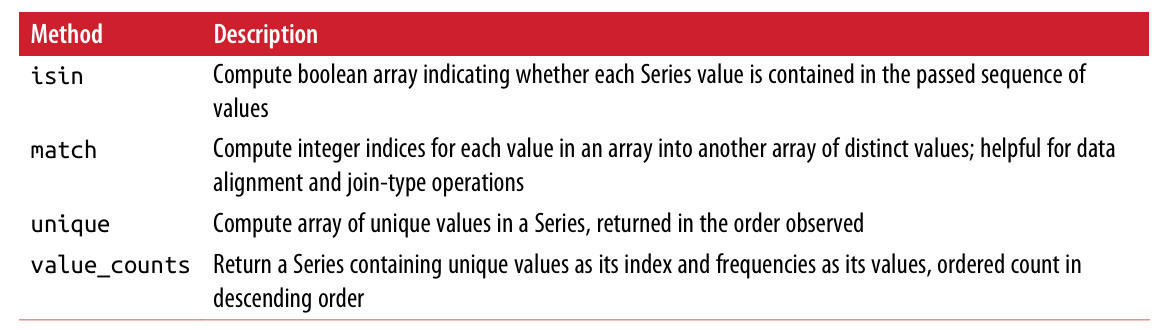